In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import math
import os
import collections
import dscrutils2py as dscrutils

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pymir import mpl_stylesheet
from pymir import mpl_utils
from pymir import pd_utils

import methodprops
import methodplots

mpl_stylesheet.banskt_presentation()

In [2]:
dsc_outdir = os.path.realpath("../dsc/trial")

# methods in the simulation
methods = ["ridge", "lasso", "lasso_1se", "elastic_net",
           "elastic_net_1se", "l0learn", "scad", "mcp", 
           "susie", "varbvs", "varbvsmix", "blasso", "bayesb",
           "mr_ash", "mr_ash_init", "em_vamp", "em_vamp_ash"]
highdims = (100, 200)
lowdims  = (500, 200)
sfracs = [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1.0]
targets = ["simulate", "simulate.dims", "simulate.se", "simulate.rho",
           "simulate.sfrac", "simulate.pve", "fit", "fit.DSC_TIME", "mse.err"]

In [3]:
%%capture capt
dscout = dscrutils.dscquery(dsc_outdir, targets)
dscout['score1'] = np.sqrt(dscout['mse.err'])/dscout['simulate.se']
pve_list = sorted(list(set(dscout["simulate.pve"].to_list())))
rho_list = sorted(list(set(dscout["simulate.rho"].to_list())))

INFO: Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: NumExpr defaulting to 8 threads.


In [4]:
capt.show()

Calling: dsc-query /home/saikat/Documents/work/ebmr/simulation/eb-linreg-dsc/dsc/trial -o /tmp/Rtmpyob0q9/file490f3587aef92.csv --target "simulate simulate.dims simulate.se simulate.rho simulate.sfrac simulate.pve fit fit.DSC_TIME mse.err" --force 
Loaded dscquery output table with 1120 rows and 12 columns.



In [5]:
dscout

,DSC,simulate,simulate.dims,simulate.se,simulate.rho,simulate.sfrac,simulate.pve,fit,fit.DSC_TIME,mse.err,score1
0,1,indepgauss,"(500,200)",3.462448,0.00,0.010,0.50,l0learn,0.437,12.563997,1.023719
1,1,indepgauss,"(100,200)",0.861522,0.00,0.010,0.50,l0learn,0.852,0.654125,0.938780
2,1,indepgauss,"(500,200)",1.846167,0.00,0.025,0.50,l0learn,0.372,3.564847,1.022703
3,1,indepgauss,"(100,200)",1.249624,0.00,0.025,0.50,l0learn,0.754,1.806580,1.075596
4,1,indepgauss,"(500,200)",2.791099,0.00,0.050,0.50,l0learn,0.384,7.573690,0.986003
...,...,...,...,...,...,...,...,...,...,...,...
1115,1,equicorrgauss,"(100,200)",1.002166,0.95,0.250,0.95,mcp,0.720,3.017753,1.733413
1116,1,equicorrgauss,"(500,200)",0.705088,0.95,0.500,0.95,mcp,16.698,1.513339,1.744715
1117,1,equicorrgauss,"(100,200)",1.743666,0.95,0.500,0.95,mcp,0.670,7.841835,1.606000
1118,1,equicorrgauss,"(500,200)",2.921284,0.95,1.000,0.95,mcp,28.215,15.724077,1.357403


In [9]:
# methods to be shown in the plots
whichmethods = ["l0learn", "lasso", 
                #"lasso_1se", 
                "ridge", "elastic_net", 
                #"elastic_net_1se", 
                "scad", "mcp",
                "blasso", "bayesb", "susie", 
                "varbvs", "varbvsmix", 
                "mr_ash", #"mr_ash_init",
                "ebmr_lasso", "ebmr_ash",
                #"em_vamp", "em_vamp_ash"
               ]

### High dimension setting (p > n)

Simulations were performed with n = 100, p = 200.

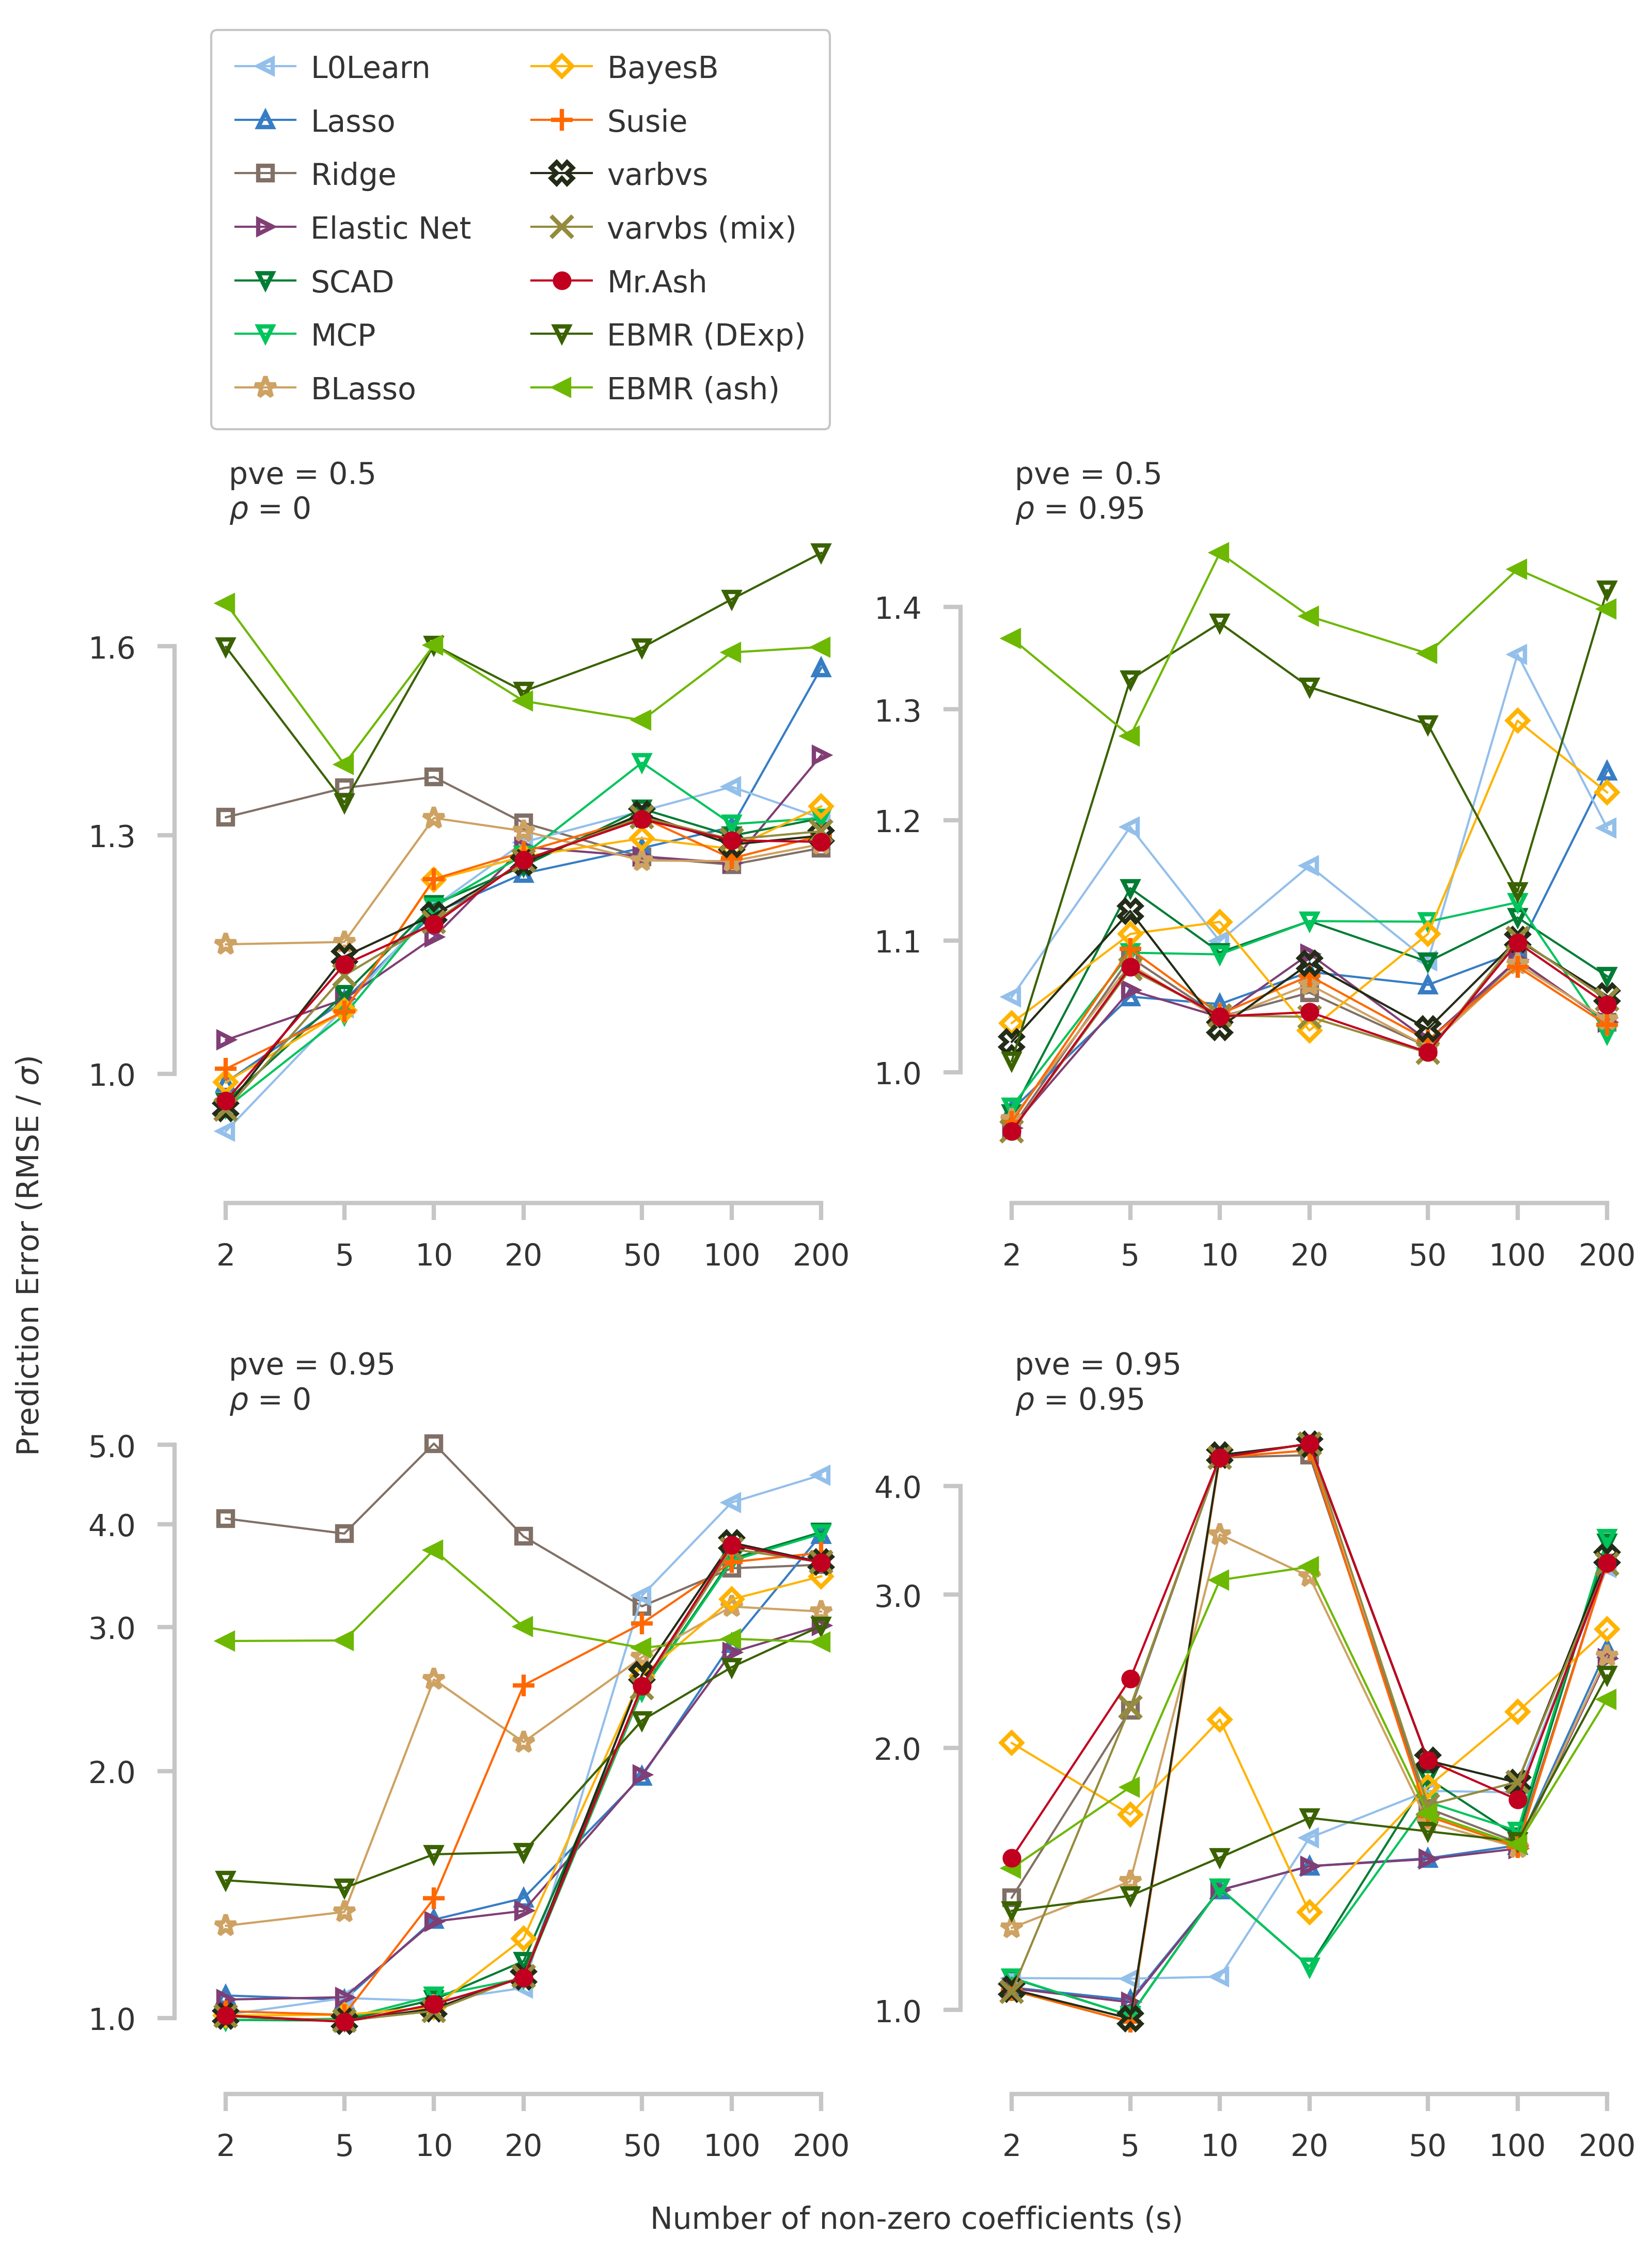

In [10]:
highdim_condition = [f"$(simulate.dims) == '({highdims[0]},{highdims[1]})'"]
resdf1         = pd_utils.select_dfrows(dscout, highdim_condition)

# Create the figure.
# whichmethods: the methods to be shown in the plot
methodplots.create_figure_prediction_error(whichmethods, resdf1, highdims, rho_list, pve_list, sfracs)

### Low dimension setting p < n)

Simulations were performed with n = 500, p = 200.

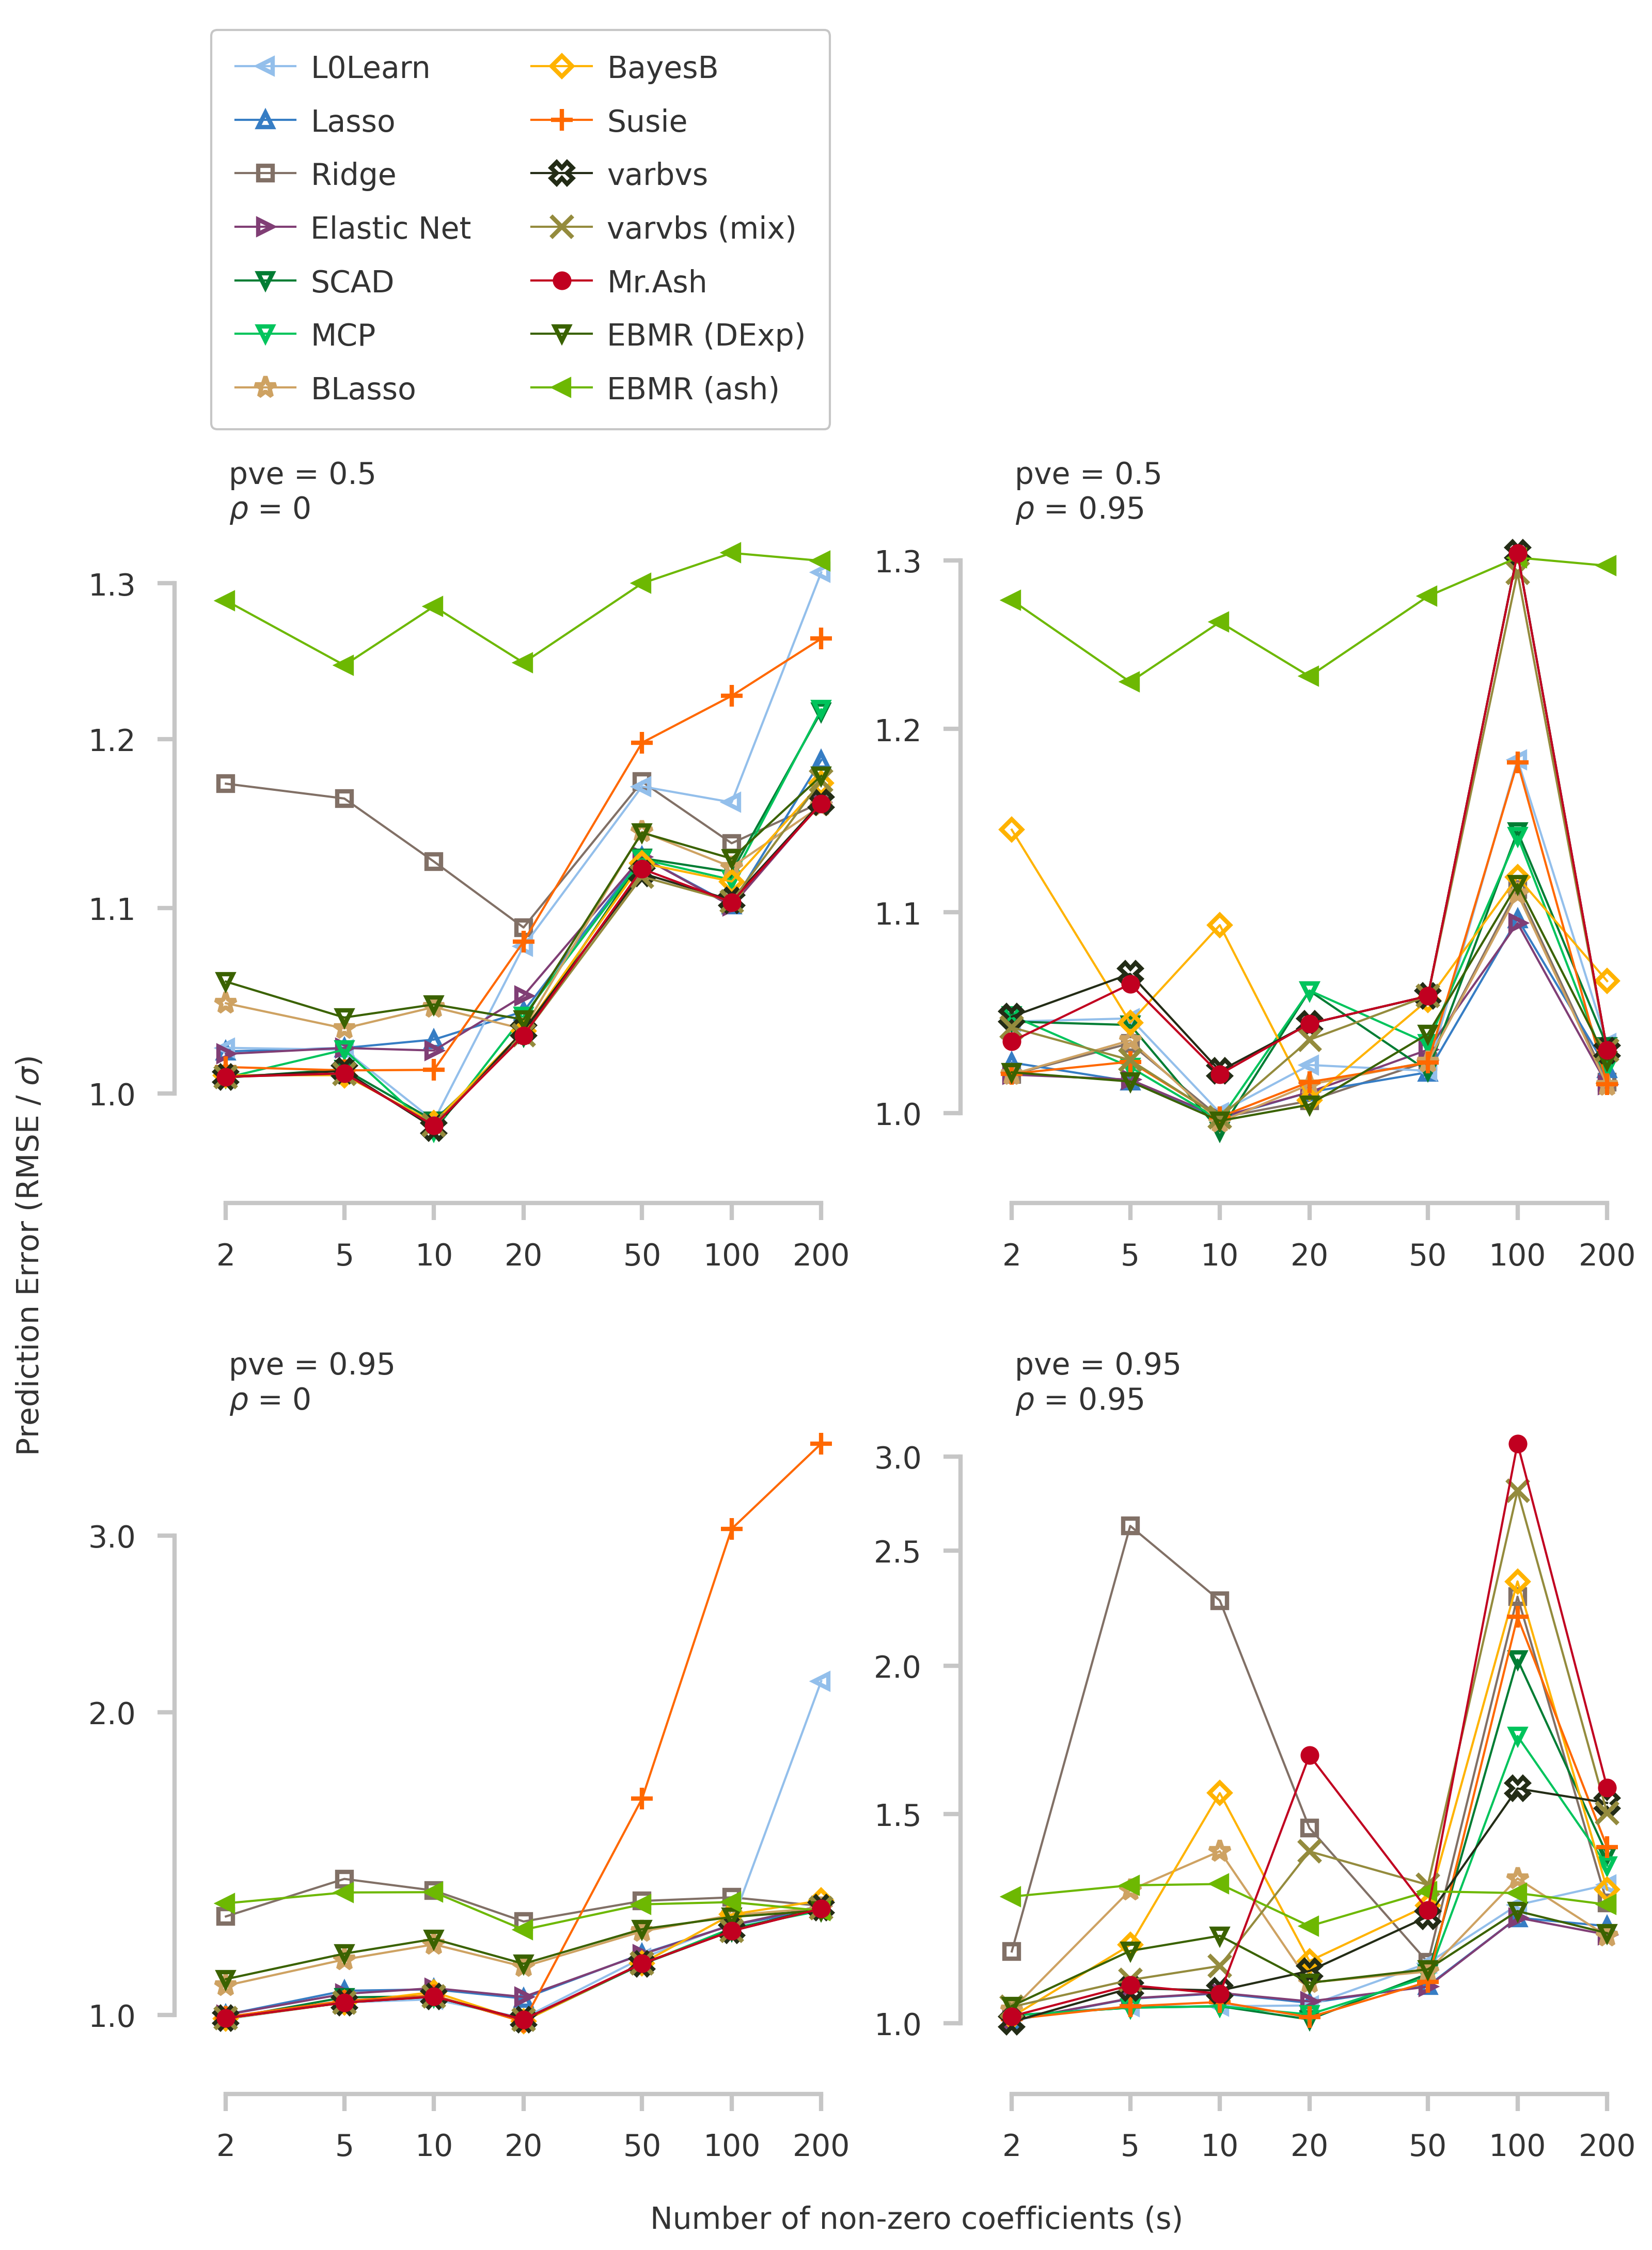

In [11]:
lowdim_condition = [f"$(simulate.dims) == '({lowdims[0]},{lowdims[1]})'"]
resdf2           = pd_utils.select_dfrows(dscout, lowdim_condition)

# Create the figure.
# whichmethods: the methods to be shown in the plot
methodplots.create_figure_prediction_error(whichmethods, resdf2, lowdims, rho_list, pve_list, sfracs)

### Computational time

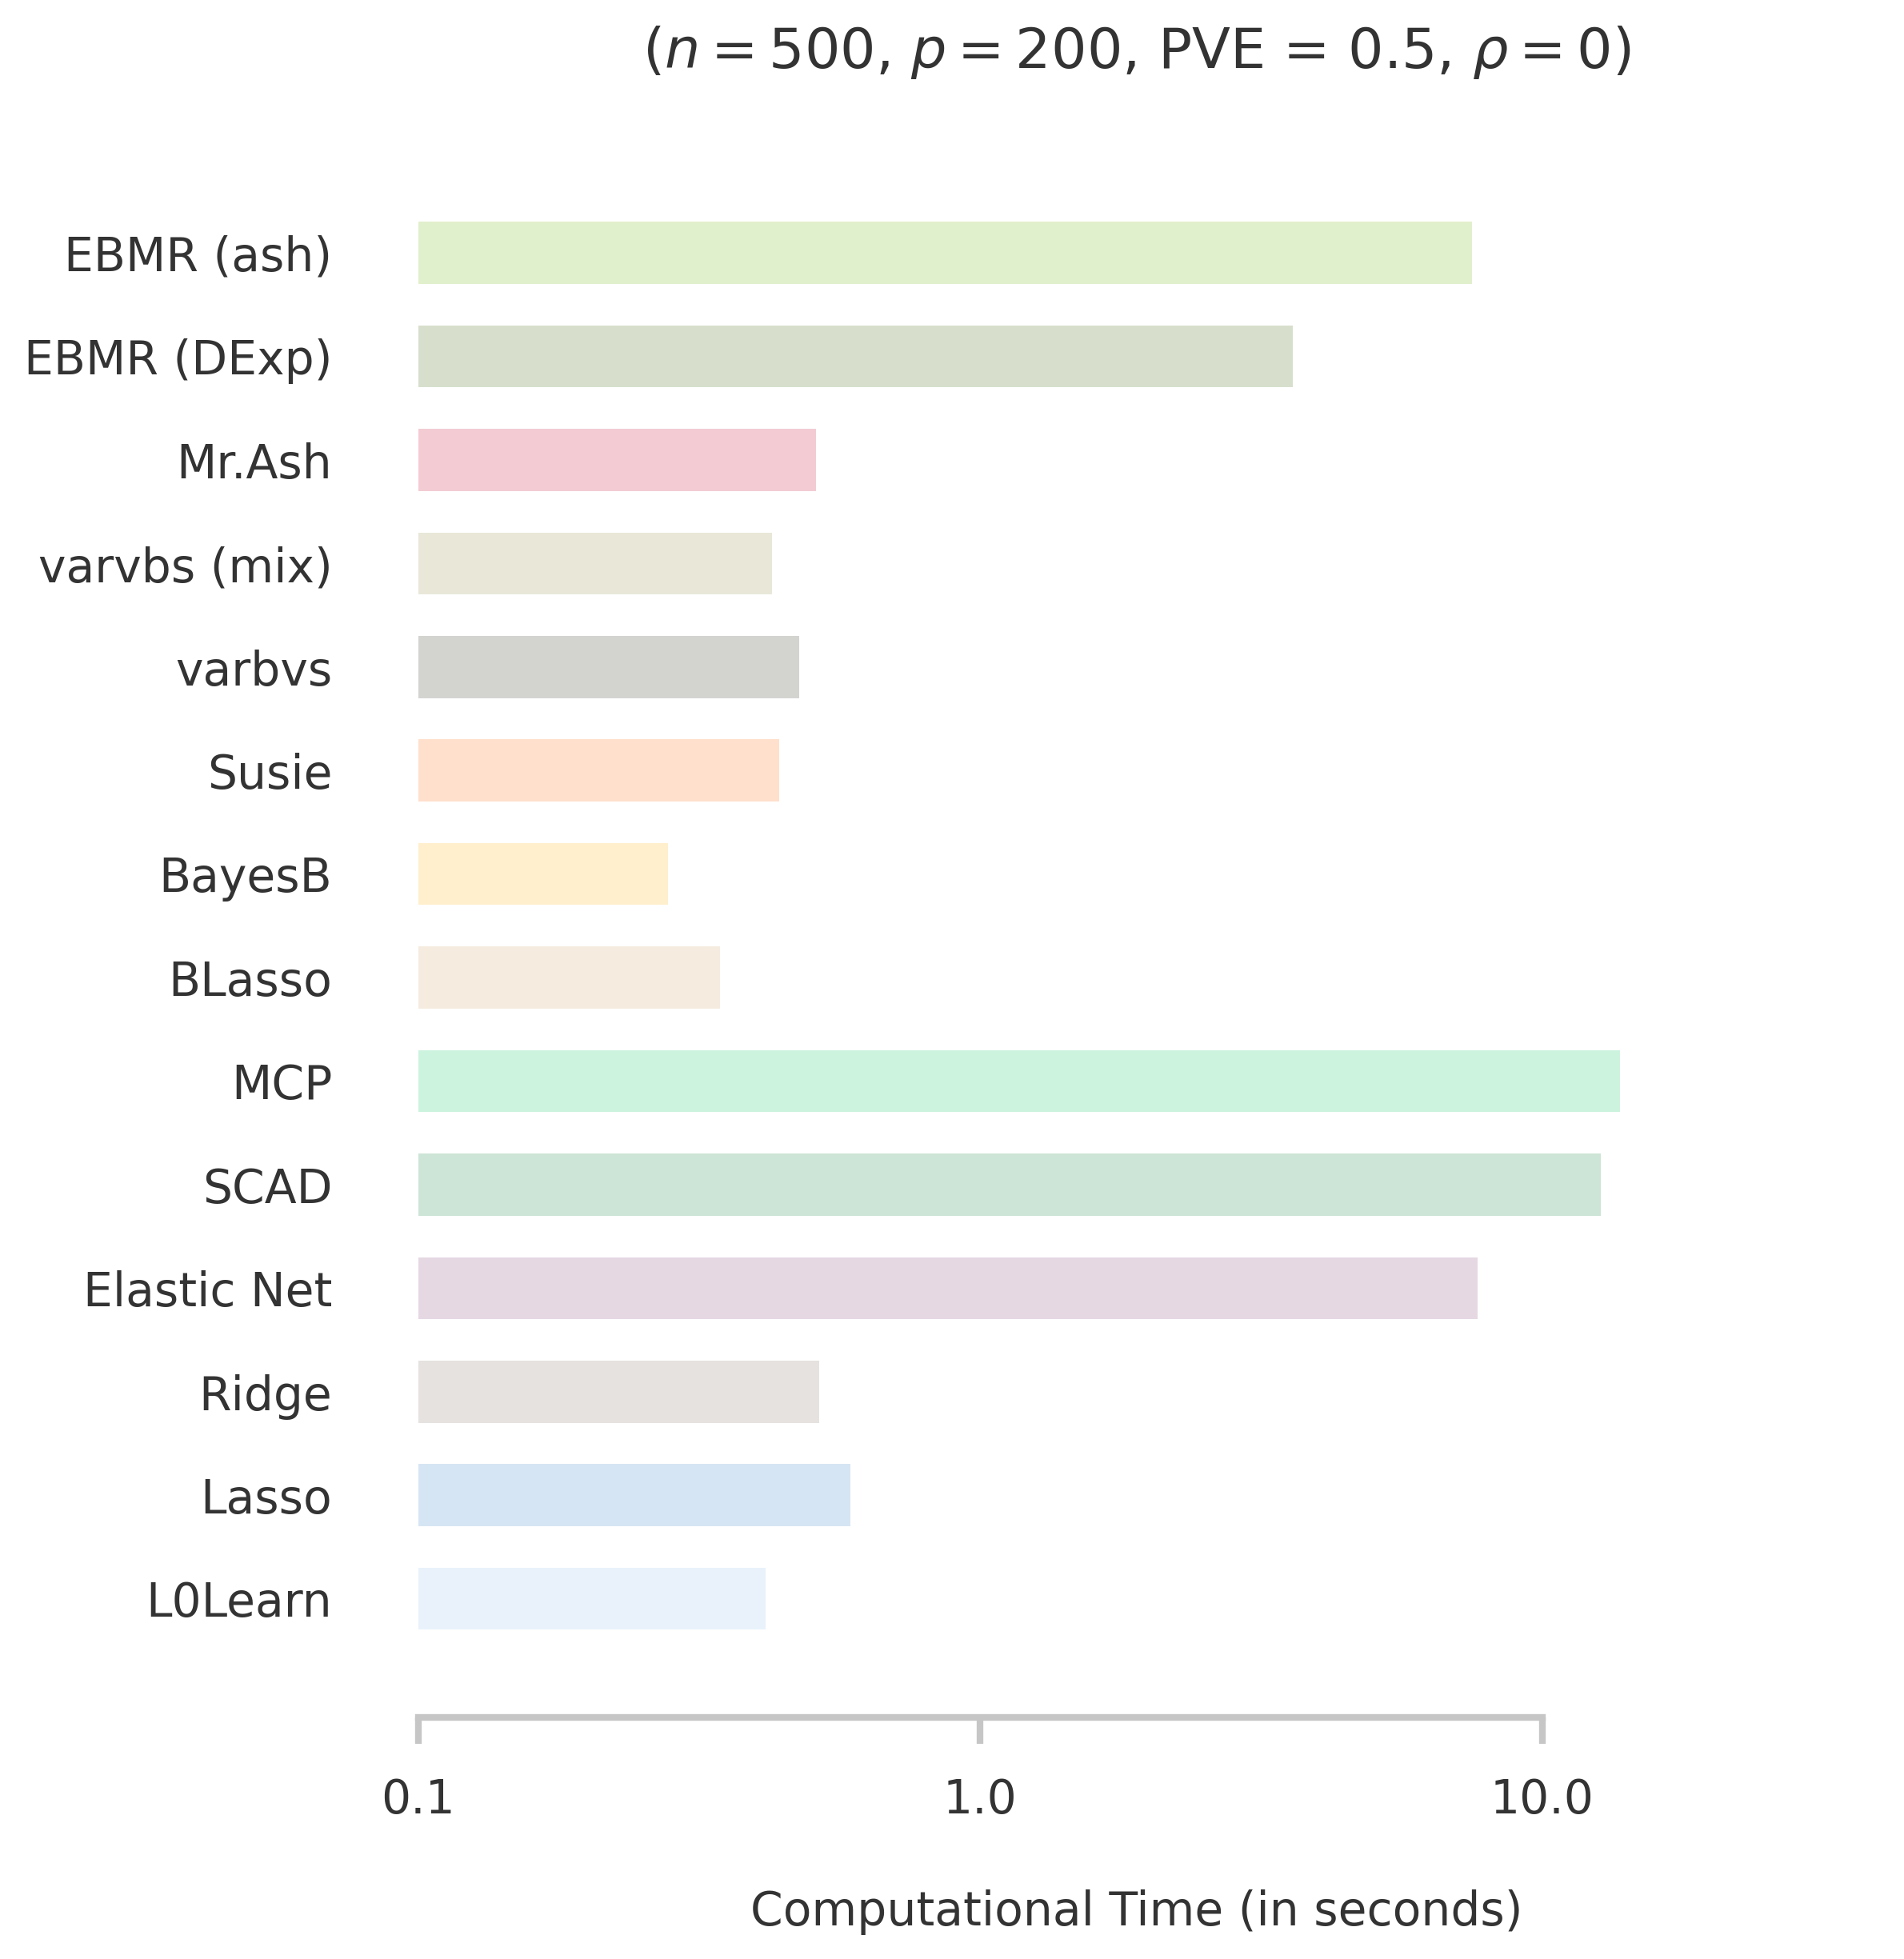

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Choose settings
dims    = lowdims
pve     = 0.5
rho     = 0
sfrac   = 0.5
data    = resdf2.copy() if dims == lowdims else resdf1.copy()

# Plot
methodplots.single_plot_computational_time(ax1, data, "fit.DSC_TIME", whichmethods, pve, rho, dims, sfrac)
ax1.set_xlabel("Computational Time (in seconds)")
ax1.set_title(r"($n=$" + f"{dims[0]}, " + r"$p=$" + f"{dims[1]}, PVE = {pve}, " + r"$\rho = $" + f"{rho})",
              pad = 40)

plt.show()